# Reductions

Dependencies for this notebook: `graphviz` executable installed on the system and on the path, [networkx](https://anaconda.org/anaconda/networkx), [graphviz python](https://anaconda.org/conda-forge/python-graphviz) and [pydotplus](https://anaconda.org/conda-forge/pydotplus) Anaconda packages. (See [here](https://graphviz.readthedocs.io/en/stable/index.html) for the documentation of the graphviz package.)


In [30]:
%%html
<style>

.CodeMirror {
    width: 100vw;
}
S
.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

</style>

_Useful unicode symbols:_ φ   ∨   ∧   ¬   ≠    Ψ

### Utility code (skip reading but run this first)

In [2]:
%run "NANDutils.ipynb"

Finished running utility code


In [3]:
%%html
<iframe src="http://free.timeanddate.com/countdown/i5vf6j5p/n43/cf11/cm0/cu4/ct1/cs1/ca0/co0/cr0/ss0/cac09f/cpc09f/pct/tcfff/fs100/szw576/szh243/iso2018-10-23T10:30:00" allowTransparency="true" frameborder="0" width="177" height="35"></iframe>'

In [4]:
reductions = Digraph()
reductions.edges([("3SAT","Quadratic Equations"),("3SAT","Independent Set"),("3SAT","Longest Path"),("Independent Set","Maximum Cut")])

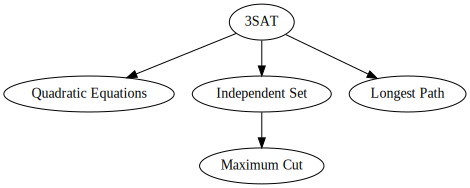

In [5]:
reductions

__Def:__ $F \leq_p G$ if there is poly-time $R:\{0,1\}^* \rightarrow \{0,1\}^*$ such that $F(x)=G(R(x))$ for every $x\in \{0,1\}^*$.

"$F$ is no harder than $G$"

__Problem:__ Prove that $F \leq_p G$ and $G \leq_p H$ implies that $F \leq_P H$

__Proof:__ If $F(x)=G(R(x))$ and $G(y)=H(R'(y))$ then $F(x)=H(R'(R(x)))$

__Question:__ Let $SHORTPATH(G,s,t,k)=1$ iff there is path $s \leadsto t$ of langth $\leq k$.

Which of the following statments is __known to be true__?

__a__ $SHORTPATH \leq_p 3SAT$ 

__b__ $3SAT \leq_p SHORTPATH$ 

__c__ $LONGPATH \leq_p SHORTPATH$

__d__ $SHORTPATH$ and $3SAT$ have equivalent complexity.

In [32]:
%%html
<iframe src="https://e.ggtimer.com/180?alert=false" allowTransparency="true" frameborder="0" width="700" height="100"></iframe>

## 3SAT 

_"The mother of all optimization problems"_

![](satinstances.png)

![](satsolvers.png)

## Some applications

* Car configurations
* (Hardware) Equivalence Checking
* Asynchronous circuit synthesis (IBM)
* Software-Verification
* Expert system verification
* Planning (air-traffic control, telegraph routing)
* Scheduling (sport tournaments)
* Finite mathematics (quasigroups)
* Cryptanalysis

__Input:__ 3CNF formula:  AND of $m$ _clauses_.  

Clause = OR of three _literals_

Literal = variable or its negation.

__Goal:__ Output 1 iif formula _satisfiable_.

In [6]:
φ = "(x0 ∨ ¬x3 ∨ x2 ) ∧ (¬x0 ∨ x1 ∨ ¬x2 ) ∧ (x1 ∨ x2 ∨ ¬x3 )  "

In [7]:
# Evaluate 3CNF φ on assignment x 
# Both are represented as strings
def evalcnf(φ,x):

    def varval(v):
        return (1-int(x[int(v[2:])])  if v[0]=="¬" else int(x[int(v[1:])]))
    
    for (v0,v1,v2) in getclauses(φ):
        # print(c+str([varval(v0),varval(v1),varval(v2)]))
        if not varval(v0)+varval(v1)+varval(v2): return False
    
    return True

# Clause list of a 3CNF φ
def getclauses(φ):
    clauses =  φ.split("∧")
    res = []
    for c in clauses:
        (v0,_,v1,_,v2) = c.strip()[1:-1].split()
        res.append((v0.strip(),v1.strip(),v2.strip()))
    return res
    

# number of variables of a formula φ
def numvars(φ):
    for n in range(len(φ)-1,0,-1):
        if φ.find('x'+str(n))>= 0: return n+1
    raise Exception


In [8]:
numvars(φ)

4

__Question:__ What is the value of φ on the assignment $x=0101$? __a__ True, __b__ False

In [36]:
%%html
<iframe src="https://e.ggtimer.com/60?alert=false" allowTransparency="true" frameborder="0" width="700" height="100"></iframe>

In [37]:
evalcnf(φ,"0101")

False

In [38]:
print(φ)

(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)


__Question:__ Is φ satisfiable?

In [39]:
%%html
<iframe src="https://e.ggtimer.com/60?alert=false" allowTransparency="true" frameborder="0" width="700" height="100"></iframe>

In [10]:
evalcnf(φ,"1000")

True

## Some bigger instances (DIMACS format)

In [11]:
def from_dimacs(cnf):
    φ = ""
    m = 0
    n = 0
    def var(idx): return f"x{int(idx)-1}" if int(idx)>0 else f"¬x{-int(idx)-1}"
    
    for line in cnf.split("\n"):
        if not line.strip() or line[0]=="c" or line[0]=="%" or line[0]=="0": continue
        if line[0]=="p":
            _,t,n_,m_ = line.split()
            if t!="cnf": raise Exception("Only handle CNF!")
            n = int(n_)
            m = int(m_)
            continue
        a,b,c,_ = line.split()
        if _ != "0": raise Exception("Only handle 3CNF!")
        φ += f"({var(a)} ∨ {var(b)} ∨ {var(c)} ) ∧ "
    φ = φ[:-3]
    return φ
        
            

In [12]:
def from_dimacs_assign(assign):
    avals = {}
    n = 0
    for a in assign.split():
        if a == "v": continue
        a = int(a)
        if a>0:
            avals[a-1] = "1"
            n = max(n,a)
        if a<0:
            avals[-a-1] = "0"
            n = max(n,-a)
        if a == 0:
            break
    x = ""
    for i in range(n):
        x += avals[i]
    return x

In [13]:
# from https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html
cnf = r'''
c This Formular is generated by mcnf
c
c    horn? no 
c    forced? no 
c    mixed sat? no 
c    clause length = 3 
c
p cnf 20  91 
 4 -18 19 0
3 18 -5 0
-5 -8 -15 0
-20 7 -16 0
10 -13 -7 0
-12 -9 17 0
17 19 5 0
-16 9 15 0
11 -5 -14 0
18 -10 13 0
-3 11 12 0
-6 -17 -8 0
-18 14 1 0
-19 -15 10 0
12 18 -19 0
-8 4 7 0
-8 -9 4 0
7 17 -15 0
12 -7 -14 0
-10 -11 8 0
2 -15 -11 0
9 6 1 0
-11 20 -17 0
9 -15 13 0
12 -7 -17 0
-18 -2 20 0
20 12 4 0
19 11 14 0
-16 18 -4 0
-1 -17 -19 0
-13 15 10 0
-12 -14 -13 0
12 -14 -7 0
-7 16 10 0
6 10 7 0
20 14 -16 0
-19 17 11 0
-7 1 -20 0
-5 12 15 0
-4 -9 -13 0
12 -11 -7 0
-5 19 -8 0
1 16 17 0
20 -14 -15 0
13 -4 10 0
14 7 10 0
-5 9 20 0
10 1 -19 0
-16 -15 -1 0
16 3 -11 0
-15 -10 4 0
4 -15 -3 0
-10 -16 11 0
-8 12 -5 0
14 -6 12 0
1 6 11 0
-13 -5 -1 0
-7 -2 12 0
1 -20 19 0
-2 -13 -8 0
15 18 4 0
-11 14 9 0
-6 -15 -2 0
5 -12 -15 0
-6 17 5 0
-13 5 -19 0
20 -1 14 0
9 -17 15 0
-5 19 -18 0
-12 8 -10 0
-18 14 -4 0
15 -9 13 0
9 -5 -1 0
10 -19 -14 0
20 9 4 0
-9 -2 19 0
-5 13 -17 0
2 -10 -18 0
-18 3 11 0
7 -9 17 0
-15 -6 -3 0
-2 3 -13 0
12 3 -2 0
-2 -3 17 0
20 -15 -16 0
-5 -17 -19 0
-20 -18 11 0
-9 1 -5 0
-19 9 17 0
12 -2 17 0
4 -16 -5 0
%
0
'''

cnfsat = "v 1 -2 -3 -4 -5 6 -7 -8 -9 -10 -11 -12 13 14 15 -16 17 -18 -19 20 0"

In [14]:
Ψ = from_dimacs(cnf)
Ψ

'(x3 ∨ ¬x17 ∨ x18 ) ∧ (x2 ∨ x17 ∨ ¬x4 ) ∧ (¬x4 ∨ ¬x7 ∨ ¬x14 ) ∧ (¬x19 ∨ x6 ∨ ¬x15 ) ∧ (x9 ∨ ¬x12 ∨ ¬x6 ) ∧ (¬x11 ∨ ¬x8 ∨ x16 ) ∧ (x16 ∨ x18 ∨ x4 ) ∧ (¬x15 ∨ x8 ∨ x14 ) ∧ (x10 ∨ ¬x4 ∨ ¬x13 ) ∧ (x17 ∨ ¬x9 ∨ x12 ) ∧ (¬x2 ∨ x10 ∨ x11 ) ∧ (¬x5 ∨ ¬x16 ∨ ¬x7 ) ∧ (¬x17 ∨ x13 ∨ x0 ) ∧ (¬x18 ∨ ¬x14 ∨ x9 ) ∧ (x11 ∨ x17 ∨ ¬x18 ) ∧ (¬x7 ∨ x3 ∨ x6 ) ∧ (¬x7 ∨ ¬x8 ∨ x3 ) ∧ (x6 ∨ x16 ∨ ¬x14 ) ∧ (x11 ∨ ¬x6 ∨ ¬x13 ) ∧ (¬x9 ∨ ¬x10 ∨ x7 ) ∧ (x1 ∨ ¬x14 ∨ ¬x10 ) ∧ (x8 ∨ x5 ∨ x0 ) ∧ (¬x10 ∨ x19 ∨ ¬x16 ) ∧ (x8 ∨ ¬x14 ∨ x12 ) ∧ (x11 ∨ ¬x6 ∨ ¬x16 ) ∧ (¬x17 ∨ ¬x1 ∨ x19 ) ∧ (x19 ∨ x11 ∨ x3 ) ∧ (x18 ∨ x10 ∨ x13 ) ∧ (¬x15 ∨ x17 ∨ ¬x3 ) ∧ (¬x0 ∨ ¬x16 ∨ ¬x18 ) ∧ (¬x12 ∨ x14 ∨ x9 ) ∧ (¬x11 ∨ ¬x13 ∨ ¬x12 ) ∧ (x11 ∨ ¬x13 ∨ ¬x6 ) ∧ (¬x6 ∨ x15 ∨ x9 ) ∧ (x5 ∨ x9 ∨ x6 ) ∧ (x19 ∨ x13 ∨ ¬x15 ) ∧ (¬x18 ∨ x16 ∨ x10 ) ∧ (¬x6 ∨ x0 ∨ ¬x19 ) ∧ (¬x4 ∨ x11 ∨ x14 ) ∧ (¬x3 ∨ ¬x8 ∨ ¬x12 ) ∧ (x11 ∨ ¬x10 ∨ ¬x6 ) ∧ (¬x4 ∨ x18 ∨ ¬x7 ) ∧ (x0 ∨ x15 ∨ x16 ) ∧ (x19 ∨ ¬x13 ∨ ¬x14 ) ∧ (x12 ∨ ¬x3 ∨ x9 ) ∧ (x13 ∨ x6 ∨ x9 ) ∧ (¬x4 ∨ x8 ∨ x19 ) ∧ (x9 

In [16]:
numvars(Ψ)

20

In [15]:
assign = from_dimacs_assign(cnfsat)
assign

'10000100000011101001'

In [17]:
evalcnf(Ψ,assign)

True

In [18]:
evalcnf(Ψ,"10000100110011101001")

False

## Quadratic Equations

In [19]:
def SAT2QE(φ):
    n = numvars(φ)
    E = ""
    
    # if lit is ¬xi return [xi] otherwise return [1,xi]
    def terms(lit): return  [lit[1:]] if lit[0]=="¬" else  ["1","-"+lit] 
    
    for (a,b,c) in getclauses(φ):
        # transform a ∨ b ∨ c to equation (1-a)·(1-b)·(1-c) = 0
        allterms = [t+"·"+u+"·"+v for t in terms(a) for u in terms(b) for v in terms(c)]
        E+= " + ".join(allterms) + " = 0\n"
    
    # Add equations xi²-xi = 0 , y(n*j+i) - xi·xj = 0
    # Replace xi·xj with y(n*j+i)
    for i in range(n):
        E += f"x{i}²- x{i} = 0\n"
        for j in range(i):
            E = E.replace(f"x{i}·x{j}",f"y{n*j+i}").replace(f"x{j}·x{i}",f"y{n*j+i}")
            E = E.replace(f"x{i}·-x{j}",f"-y{n*j+i}").replace(f"x{j}·-x{i}",f"-y{n*j+i}")
            E = E.replace("--","").replace("+ -","- ").replace("- -","+ ")
            E += f"y{n*j+i} - x{i}·x{j} = 0\n"
    
    return E

In [20]:
φ = "(x0 ∨ ¬x3 ∨ x2 ) ∧ (¬x0 ∨ x1 ∨ ¬x2 ) ∧ (x1 ∨ x2 ∨ ¬x3 )"
print(SAT2QE(φ))

1·x3·1 + 1·-y11 - y3·1 - y3·-x2 = 0
x0·1·x2 - y1·x2 = 0
1·1·x3 + 1·-y11 - x1·1·x3 + y6·x3 = 0
x0²- x0 = 0
x1²- x1 = 0
y1 - x1·x0 = 0
x2²- x2 = 0
y2 - x2·x0 = 0
y6 - x2·x1 = 0
x3²- x3 = 0
y3 - x3·x0 = 0
y7 - x3·x1 = 0
y11 - x3·x2 = 0



In [21]:
print(SAT2QE(Ψ))

1·x17·1 + 1·-y378 - y237·1 - y237·-x18 = 0
1·1·x4 + 1·-y97 - x2·1·x4 + y227·x4 = 0
x4·y274 = 0
x19·1·x15 + x19·-y265 = 0
1·y132 - y292·x6 = 0
y171·1 + x11·-y286 = 0
1·1·1 + 1·1·-x4 + 1·-x18·1 + 1·y98 - x16·1·1 - x16·1·-x4 + y368·1 + y368·-x4 = 0
x15·1·1 + x15·1·-x14 - y175·1 + x15·y284 = 0
1·y243 - x10·y243 = 0
1·x9·1 + 1·-y292 - y197·1 - x17·-y292 = 0
x2·1·1 + x2·1·-x11 - y220·1 - y220·-x11 = 0
y256·x7 = 0
x17·1·1 + x17·1·-x0 - y373·1 + x17·y13 = 0
y384·1 + x18·-y194 = 0
1·1·x18 + 1·-y378 - x11·1·x18 + y317·x18 = 0
x7·1·1 + x7·1·-x6 - y67·1 + x7·y66 = 0
y148·1 + x7·-y68 = 0
1·1·x14 + 1·-y364 - x6·1·x14 + y266·x14 = 0
1·y263 - x11·y263 = 0
y290·1 + y290·-x7 = 0
1·y340 - x1·y340 = 0
1·1·1 + 1·1·-x0 + 1·-x5·1 + 1·y5 - x8·1·1 - x8·1·-x0 + y108·1 - x8·y5 = 0
x10·1·x16 - y309·x16 = 0
1·x14·1 + 1·-y342 - y284·1 - y284·-x12 = 0
1·y266 - x11·y266 = 0
y37·1 + y37·-x19 = 0
1·1·1 + 1·1·-x3 + 1·-x11·1 + 1·y71 - x19·1·1 - x19·1·-x3 + y391·1 - x19·y71 = 0
1·1·1 + 1·1·-x13 + 1·-x10·1 + 1·y303 - x18·1

## Clique problem

__Input:__ Graph $G=(V,E)$ and $k\in\mathbb{N}$

__Output:__ $1$ if there is $S \subseteq V$ with $|S| \geq k$ s.t. $\{i,j \} \in E$ for every $i \neq j \in S$.

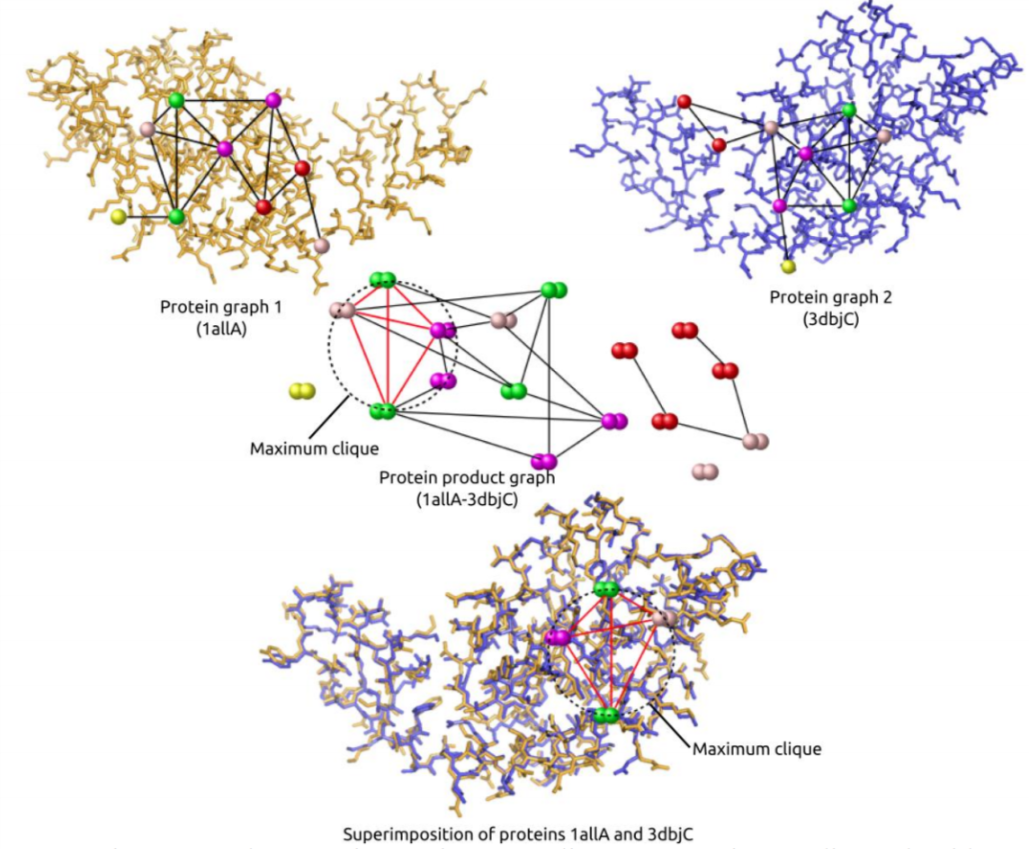

In [22]:
Image('clique.png' ,width=500)

__Question:__ Is $3SAT \leq_p CLIQUE$ __a__ Yes __b__ No ,  __c__ I don't know 

In [40]:
%%html
<iframe src="https://e.ggtimer.com/60?alert=false" allowTransparency="true" frameborder="0" width="700" height="100"></iframe>


$CLIQUE(G,k)=ISET(\overline{G},k)$

## 3SAT to independent set

__Thm:__ $3SAT \leq_p IS$

To prove need to show poly-time $R$ s.t. $R(\varphi)=G$ s.t. 

* __completeness:__ If $\varphi$ satisfiable then there is i.set of $G$ of size $\geq k$

* __soundness:__ If there is an i.set of $G$ with size $\geq k$ then $\varphi$ satisfiable.

__Proof:__ $3m$ vertices: $(x_7$ $\vee$ $\neg x_{10}$ $\vee$ $x_{12})$ maps to _triangle_, additional edges between __inconsistent vertices__

assignment $\Leftrightarrow$ independent set

In [23]:
# Reduction SAT to Independent Set
def SAT2IS_(φ):
    n = numvars(φ) 
    G =Graph() #(engine='neato')
    
    def nname(c,v): return f"({c},{v})"
    
    c = 0
    # nodes[literal] = vertices corresponding to this literal
    nodes = {f"x{i}":[] for i in range(n)}
    nodes.update(  {f"¬x{i}":[] for i in range(n)})
  
    c=0
    for C in getclauses(φ):
        for u in C: 
            G.node(nname(c,u),f"{c},{subscript(u)}",fontsize="12")
            negu = u[1:] if u[0]=="¬" else "¬"+u
            # add conflicting edges
            for v in nodes[negu]: G.edge(nname(c,u),v,color="red") 
            nodes[u].append(nname(c,u))
        # add triangle edges
        G.edges([[nname(c,C[0]), nname(c,C[1])],[nname(c,C[1]), nname(c,C[2])],[nname(c,C[0]), nname(c,C[2])]])
        c += 1
    
    return G

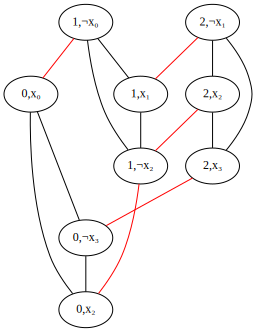

In [24]:
φ = "(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)"
SAT2IS_(φ)

In [25]:
# same reduction but taking care of colors and keeping track what happens to an assignment
def SAT2IS(φ,x=""):
    S = []
#    G.node(u,style='filled',fillcolor=('red' if x and x[i]=="0" else 'green'))
        
    n = numvars(φ) 
    G =Graph() # (engine='neato')
    
    def nname(c,v): return f"({c},{v})"
    
    c = 0
    nodes = {}
    for i in range(n):
        nodes["x"+str(i)] = []
        nodes["¬x"+str(i)] = []
    
    for C in getclauses(φ):
        sat = False
        for u in C: 
            if x and (not sat) and (((u[0]=="¬") and (x[int(u[2:])]=="0")) or ((u[0]!="¬") and (x[int(u[1:])]=="1"))):
                G.node(nname(c,u),f"{c},{subscript(u)}",fontsize="10",style='filled',fillcolor='green')
                S.append(nname(c,u))
                sat = True
            else:
                G.node(nname(c,u),f"{c},{subscript(u)}",fontsize="10")
            negu = u[1:] if u[0]=="¬" else "¬"+u
            for v in nodes[negu]: G.edge(nname(c,u),v,color="red") 
            nodes[u].append(nname(c,u))
        G.edges([[nname(c,C[0]), nname(c,C[1])],[nname(c,C[1]), nname(c,C[2])],[nname(c,C[0]), nname(c,C[2])]])
        c += 1
    
    return (scale(G) if not x else (scale(G),S))

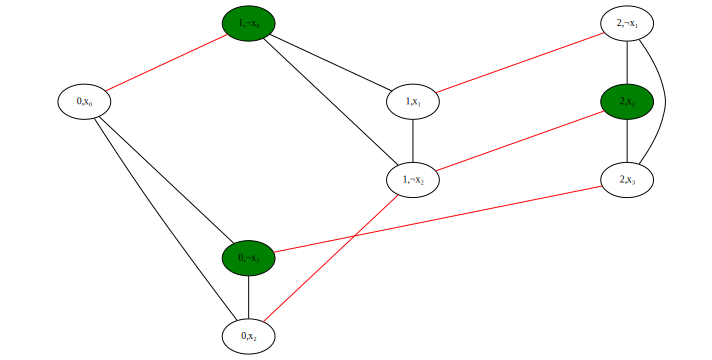

In [26]:
φ = "(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)"
(G,S) = SAT2IS(φ,"0110")
G

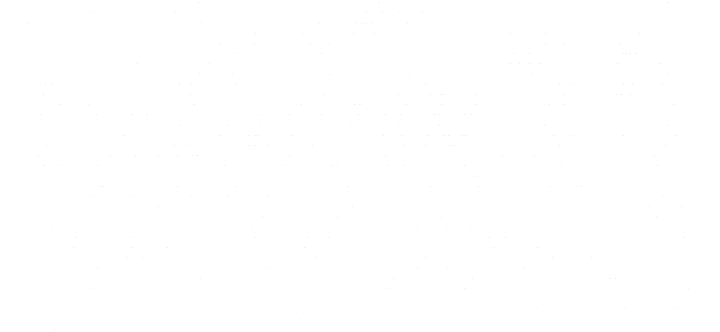

In [27]:
SAT2IS(Ψ)

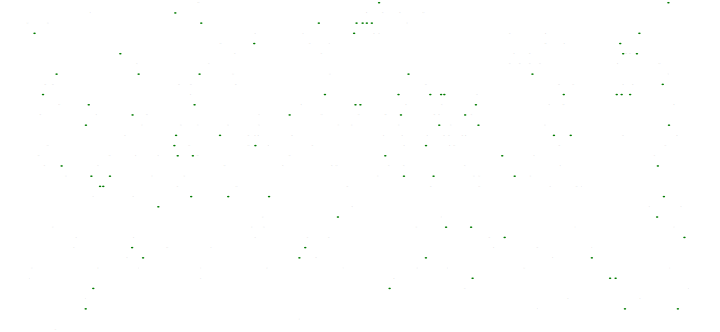

In [28]:
SAT2IS(Ψ,assign)[0]

__Completeness:__  $\exists$ sat assign. $\varphi$ $\Rightarrow$ $\exists$ $m$ iset in $G$ 

__Pf:__ One vertex out of triangle 

__Soundness:__ $\exists$ $m$ iset in $G$ $\Rightarrow$ $\exists$ sat assign. $\varphi$ 

__Pf:__ $m$ iset must have one vtx per triangle

If "$x_i=a$" in  $I$ then set $x_i=a$.

$x$ must satisfy all clauses.

## Proof by program

In [52]:
def recoverassignment(G,S,n):
    """Transform independent set S for G into a satisfying assignment for original formula"""
    x = [1]*n
    for i in range(n):
        for v in S: 
            if v.find(f"¬x{i}")>=0: x[i]=0
    return x

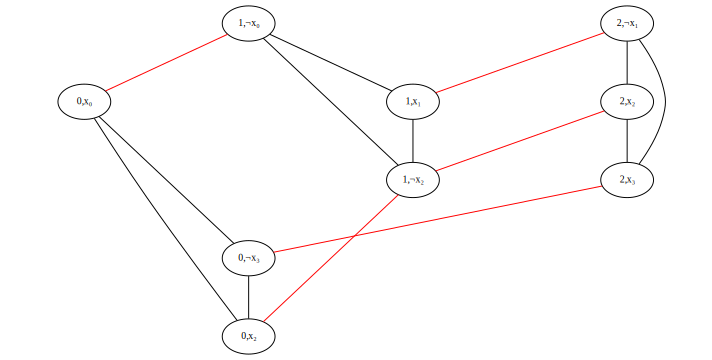

In [53]:
φ = "(x0 ∨ ¬x3 ∨ x2) ∧ (¬x0 ∨ x1 ∨ ¬x2) ∧ (¬x1 ∨ x2 ∨ x3)"
G = SAT2IS(φ)
G

In [51]:
recoverassignment(G,['(0,¬x3)', '(1,¬x0)', '(2,x2)'],4)

[0, 1, 1, 0]

## Independent Set to Maximum Cut

__Def:__ If $G=(V,E)$ and $S \subseteq V$ then $cut(S)$ is number of edges $\{u,v\}$ with $u\in S$ and $v\not\in S$.

$MAXCUT(G,k) = 1$ iff there is $S$ with $cut(S) \geq k$.

![](maxcut.png)

__Thm:__ $ISET \leq_p MAXCUT$

__Corollary:__ $3SAT \leq_p MAXCUT$

__Proof:__ $G=(V,E)$  maps to $H$ with: 

* Special _source_ vertex

* $n$ vertices corresponding to $V$

* $2m$ extra vertices $e_0,e_1$ for each edge

__Edges:__ $\{s^*,v \}$ for all $v\in V$, $5$ edge gadget for every $e\in E$.

__Claim:__ $G$ has $k$ iset $\Leftrightarrow$ $H$ has cut of $k+4m$ edges.

In [ ]:
# Reduction IS to MAXCUT
def IS2MAXCUT(G):
    G =nxgraph(G)
    H =Graph(engine='sfdp')
    s ="source"
    H.node(s) # create source node
    
    for v in G.nodes(): 
        H.node(v,shape="square")
        H.edge(s,v)
    
    j =0
    for (u,v) in G.edges():
        g1 = "e"+str(j)+"a"
        g2 = "e"+str(j)+"b"
        H.node(g1,label=u+"-"+v)
        H.node(g2,label=u+"-"+v)
        # add gadget
        H.edges([(s,g1),(s,g2),(g1,g2),(u,g1),(v,g2)]) 
        j +=1
        
    
    return H

In [ ]:
G = IS2MAXCUT(SAT2IS(φ))
G.graph_attr.update(size="11,5", ratio="fill")
G

In [ ]:
# same reduction as above but handling colors and showing the resulting cut when the original graph has independent set
def IS2MAXCUT(G,I=[]):
    G =nxgraph(G)
    S = []
    H =Graph() # engine='sfdp')
    H.node("source",style='filled',fillcolor='blue')
    S.append("source")
    for v in G.nodes():
        color = ('red' if I and v in I else 'lightblue')
        H.node(v,label=subscript(v),fontsize="10",style='filled',fillcolor=color, shape="square")
        ecol = 'black'
        pwidth = '1'
        if I and v in I: 
            S.append(v)
            ecol = 'red'
            pwidth = '2'
        H.edge("source",v,color=ecol,penwidth=pwidth)  # len="2"
    
    j =0
    for (u,v) in G.edges():
        g1 = "e"+str(j)+"a"
        g2 = "e"+str(j)+"b"
        c1 = 'green'
        c2 = 'green'
        if I and (not u in I):
            c1 = 'red'
            S.append(g1)
        if I and (not v in I):
            c2 = 'red'
            S.append(g2)
        gadget = Graph("gadget"+str(j))
        gadget.node(g1,subscript("e0"),fontsize="10",style='filled',fillcolor=c1)
        gadget.node(g2,subscript("e1"),fontsize="10",style='filled',fillcolor=c2)
        gadget.edge(g1,g2,color=('red' if (g1 in S) != (g2 in I) else 'black'), penwidth=('2' if (g1 in S) != (g2 in I) else '1')) # len="1"
        gadget.edge(u,g1, color=('red' if (g1 in S) != (u in I) else 'black'),penwidth =('2' if (g1 in S) != (u in S) else '1')  ) # len="1"
        gadget.edge(v,g2, color=('red' if (g2 in S) != (v in I) else 'black'),penwidth= ('2' if (g2 in S) != (v in S) else '1') ) # len="1"
        
        H.subgraph(gadget)
        H.edge(g1,"source",color=('red' if (g1 in S)  else 'black'),penwidth=('2' if (g1 in S)  else '1')) # len="2.5"
        H.edge(g2,"source",color=('red' if (g2 in S)  else 'black'),penwidth= ('2' if (g2 in S)  else '1') )
        j +=1
        
    
    return (scale(H),S) if I else scale(H)

In [ ]:
# IS2MAXCUT(*SAT2IS(φ,"1000"))[0]
IS2MAXCUT(SAT2IS(φ))

In [ ]:
IS2MAXCUT(SAT2IS(Ψ))

In [ ]:
IS2MAXCUT(*SAT2IS(Ψ,assign))[0]

__Claim:__ $G$ has $k$ iset $\Leftrightarrow$ $H$ has cut of $k+4m$ edges.

![](ISETtoMAXCUT.png)

__Claim:__ $H$ has cut of $k+4m$ edges $\Rightarrow$ $G$ has set $I$ with $|I|-|E(I,I)| \geq k$.

## $k$  SAT 

__Problem:__ Prove that $4SAT \leq_p 3SAT$.

In [ ]:
%%html
<iframe src="https://e.ggtimer.com/180?alert=false" allowTransparency="true" frameborder="0" width="700" height="100"></iframe>

__Solution:__ $(a \vee b \vee c \vee d) \Leftrightarrow (a \vee b \vee s) \wedge (c \vee d \vee \neg s)$

__Problem:__ $1in3SAT$ is like 3SAT but satisfying assignment only allows _exactly one true literal_

Prove that $3SAT \leq_p 1in3SAT$

In [54]:
%%html
<iframe src="https://e.ggtimer.com/180?alert=false" allowTransparency="true" frameborder="0" width="700" height="100"></iframe>

__Problem__ $SUBSETSUM$ input is $X_0,\ldots,X_{n-1},T$ and output is $1$ iff there exists $S$ such that $\sum_{i\in S} X_i = T$.
Prove $3SAT \leq_p SUBSETSUM$

Intermediate problem $SUBSETSUMVEC$, input is $X_0,\ldots,X_{n-1}$ vectors with $0,1$ coordinates and $T$ is vector, output is $1$ iff there exists $S$ such that $\sum_{i\in S} X_i = T$.

We prove $3SAT \leq_p SUBSETSUMVEC$ and $SUBSETSUMVEC \leq_p SUBSETSUM$

## Three coloring

![](3colgadget.png)

In [ ]:
def SAT23COL(φ,x=""):
    n = numvars(φ) 
    clauses = getclauses(φ)
    m = len(clauses)
    G =Graph() # (engine='neato')
    col = {}
    
    
    def nname(c,v): return f"({c},{v})"
    
    G.node("null", style="filled", fillcolor = "blue")
    G.node("true", style="filled", fillcolor = "green")
    G.node("false", style="filled", fillcolor = "red")
    G.edges(["null","true"],["null","false"],["true","false"])
    c = 0
    for i in range(n):
        if x:
            G.node("x"+str(i), style='filled', fillcolor = 'green' if x[i]=="1" else 'red')
            G.node("¬x"+str(i), style='filled', fillcolor = 'green' if x[i]=="0" else 'red')
        else
            G.node("x"+str(i)) fillcolor = 'green' if x[i]=="0" else 'red')
            G.node("¬x"+str(i))
        G.edge("x"+str(i),"null")
        G.edge("¬x"+str(i),"null")
        
    for C in clauses:
        # work in progress
    return (scale(G) if not x else (scale(G),col))